<h1 align="center">Introducción</h1>

Como objetivo en el desarrollo del trabajo practico, lo que buscamos es probar el DataSet con las ingenierias de features que se le habian hecho en el tp1_exploration, donde se le aplico one hot-encoder a las columnas de Sexo, Thalassemia, Chest_Pain_type bajo criterios de discusiones que encontramos de otros usuarios con mas conocimiento en la materia, dentro de las discusiones de kaggle. 
Los modelos en los cuales nos queremos enfocar, son:

<ul>
    <li>Arboles de decisión</li>
    <li>Regresion Logistica</li>
    <li>Redes Neuronales</li>
    <li>Ensemble: Random Forest</li>
</ul>
    
Como metricas para el trabajo definimos una principal que es la accuracy, pero tambien nos parece interesante los resultados que arrojaria una metrica como recall en este tipo de estudio, por eso decidimos incluirla:

<ul>
    <li><strong>Accuracy</strong> --> Para saber en que porcentaje acertamos las predicciones de que una persona va a tener enfermedad del corazon o no </li>
    <li><strong>Recall</strong> --> Ver cuales de esos casos que acertamos, realmente estaban enfermos del corazon sobre la cantidad de enfermos total que habia. La idea de esta eleccion, es porque creemos que es mejor decirle a un paciente sano, que esta enfermo y tome precaucion antes que, este enfermo y se le haya dicho que no lo esta.
</ul>



In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

#Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Redes Neuronales
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization


In [12]:
#Full va a representar al dataset con ingenieria de features aplicadas en el tp1_exploration.ipynb
full = pd.read_csv("./heart_features.csv", index_col=0)


#Realizamos division en Train y Test del dataset y a su vez el split en x e y de los mismos.
x = full.drop(['target'], axis = 1)
y = full.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

<h1 align="center">Representacion de Modelos:<h1>
    
<h3>Regresion Logistica</h3>

In [30]:
#Prediccion en Train
classifier_LR = LogisticRegression(random_state=4)
classifier_LR.fit(x_train,y_train)
pred_LR = classifier_LR.predict(x_train)
accuracyTrain_LR = accuracy_score(y_train, pred_LR)

#Prediccion en Test
pred_LR = classifier_LR.predict(x_test)
confusionMatrix_LR = confusion_matrix(y_test, pred_LR)
accuracyTest_LR = accuracy_score(y_test, pred_LR)


/home/malta/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy en Train:  0.8813559322033898
Accuracy en Test:  0.8666666666666667


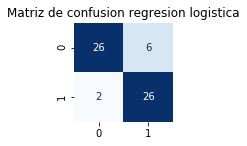

In [34]:
print('Accuracy en Train: ',accuracyTrain_LR)
print('Accuracy en Test: ',accuracyTest_LR)

plt.subplot(2,3,1)
plt.title("Matriz de confusion regresion logistica")
sns.heatmap(confusionMatrix_LR ,annot=True,cmap="Blues",fmt="d",cbar=False)

In [6]:



#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)

knn_predtrain=knn.predict(X_train)
knn_cmtrain=confusion_matrix(y_train,knn_predtrain)
knn_actrain=accuracy_score(knn_predtrain,y_train)

/home/malta/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
model = Sequential()
model.add(Dense(15, input_dim=19, activation='sigmoid'))
model.add(Dense(35, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
output = model.fit(x_train, y_train,validation_split=0.2, epochs=200, batch_size=x_train.shape[0]//2)

Train on 188 samples, validate on 48 samples
Epoch 1/200
188/188 [==============================] - 0s 1ms/step - loss: 0.6980 - acc: 0.3670 - val_loss: 0.6963 - val_acc: 0.4583
Epoch 2/200
188/188 [==============================] - 0s 21us/step - loss: 0.6913 - acc: 0.6011 - val_loss: 0.6998 - val_acc: 0.4583
Epoch 3/200
188/188 [==============================] - 0s 21us/step - loss: 0.6880 - acc: 0.5904 - val_loss: 0.7036 - val_acc: 0.4583
Epoch 4/200
188/188 [==============================] - 0s 34us/step - loss: 0.6834 - acc: 0.5798 - val_loss: 0.7073 - val_acc: 0.4583
Epoch 5/200
188/188 [==============================] - 0s 24us/step - loss: 0.6804 - acc: 0.5851 - val_loss: 0.7113 - val_acc: 0.4583
Epoch 6/200
188/188 [==============================] - 0s 34us/step - loss: 0.6794 - acc: 0.5851 - val_loss: 0.7156 - val_acc: 0.4583
Epoch 7/200
188/188 [==============================] - 0s 29us/step - loss: 0.6772 - acc: 0.5851 - val_loss: 0.7191 - val_acc: 0.4583
Epoch 8/200
188/18

188/188 [==============================] - 0s 29us/step - loss: 0.6473 - acc: 0.6223 - val_loss: 0.6991 - val_acc: 0.5417
Epoch 62/200
188/188 [==============================] - 0s 21us/step - loss: 0.6464 - acc: 0.6223 - val_loss: 0.6967 - val_acc: 0.5417
Epoch 63/200
188/188 [==============================] - 0s 26us/step - loss: 0.6458 - acc: 0.6223 - val_loss: 0.6948 - val_acc: 0.5417
Epoch 64/200
188/188 [==============================] - 0s 32us/step - loss: 0.6450 - acc: 0.6223 - val_loss: 0.6940 - val_acc: 0.5625
Epoch 65/200
188/188 [==============================] - 0s 36us/step - loss: 0.6438 - acc: 0.6170 - val_loss: 0.6951 - val_acc: 0.5625
Epoch 66/200
188/188 [==============================] - 0s 26us/step - loss: 0.6427 - acc: 0.6170 - val_loss: 0.6976 - val_acc: 0.5625
Epoch 67/200
188/188 [==============================] - 0s 34us/step - loss: 0.6421 - acc: 0.6170 - val_loss: 0.7002 - val_acc: 0.5625
Epoch 68/200
188/188 [==============================] - 0s 25us/step

188/188 [==============================] - 0s 34us/step - loss: 0.5918 - acc: 0.7287 - val_loss: 0.6781 - val_acc: 0.6042
Epoch 122/200
188/188 [==============================] - 0s 21us/step - loss: 0.5914 - acc: 0.7287 - val_loss: 0.6772 - val_acc: 0.5833
Epoch 123/200
188/188 [==============================] - 0s 20us/step - loss: 0.5903 - acc: 0.7340 - val_loss: 0.6780 - val_acc: 0.5833
Epoch 124/200
188/188 [==============================] - 0s 26us/step - loss: 0.5894 - acc: 0.7340 - val_loss: 0.6793 - val_acc: 0.6042
Epoch 125/200
188/188 [==============================] - 0s 75us/step - loss: 0.5887 - acc: 0.7287 - val_loss: 0.6803 - val_acc: 0.6042
Epoch 126/200
188/188 [==============================] - 0s 39us/step - loss: 0.5884 - acc: 0.7287 - val_loss: 0.6795 - val_acc: 0.6042
Epoch 127/200
188/188 [==============================] - 0s 34us/step - loss: 0.5874 - acc: 0.7394 - val_loss: 0.6774 - val_acc: 0.5833
Epoch 128/200
188/188 [==============================] - 0s 17

188/188 [==============================] - 0s 25us/step - loss: 0.5514 - acc: 0.7500 - val_loss: 0.6570 - val_acc: 0.6250
Epoch 182/200
188/188 [==============================] - 0s 24us/step - loss: 0.5514 - acc: 0.7500 - val_loss: 0.6564 - val_acc: 0.6250
Epoch 183/200
188/188 [==============================] - 0s 45us/step - loss: 0.5503 - acc: 0.7500 - val_loss: 0.6528 - val_acc: 0.6458
Epoch 184/200
188/188 [==============================] - 0s 22us/step - loss: 0.5506 - acc: 0.7500 - val_loss: 0.6508 - val_acc: 0.6458
Epoch 185/200
188/188 [==============================] - 0s 33us/step - loss: 0.5495 - acc: 0.7553 - val_loss: 0.6524 - val_acc: 0.6458
Epoch 186/200
188/188 [==============================] - 0s 35us/step - loss: 0.5492 - acc: 0.7500 - val_loss: 0.6559 - val_acc: 0.6458
Epoch 187/200
188/188 [==============================] - 0s 22us/step - loss: 0.5486 - acc: 0.7500 - val_loss: 0.6560 - val_acc: 0.6458
Epoch 188/200
188/188 [==============================] - 0s 32

In [7]:

print('RandomForest_accuracy:\t\t',rdf_ac)
print('DecisionTree_accuracy:\t\t',dtree_ac)
print('KNN_accuracy:\t\t\t',knn_ac)
print('KNN_accuracy:\t\t\t',knn_actrain)

print(lr_cm)


LogisticRegression_accuracy:	 0.8666666666666667
RandomForest_accuracy:		 0.7833333333333333
DecisionTree_accuracy:		 0.8166666666666667
KNN_accuracy:			 0.6833333333333333
KNN_accuracy:			 0.7245762711864406
[[26  6]
 [ 2 26]]
